In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 10})
import sympy as sp

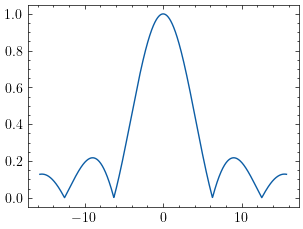

In [3]:
del_k_L = np.linspace(-5*np.pi, 5*np.pi, 1000)
E_L_t = (np.exp(1j*del_k_L)-1)/del_k_L
#E_L_t[np.isnan(E_L_t)] = 1  # Handle the case when del_k_L = 0
E_L_t_magnitude = np.abs(E_L_t)
plt.plot(del_k_L, E_L_t_magnitude, label='|E_L(t)|')

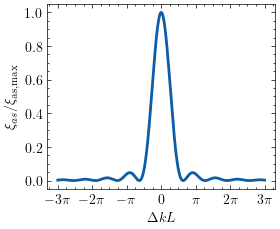

In [4]:
del_k_L = np.linspace(-3*np.pi, 3*np.pi, 1000)
xi_by_xi_max = np.sinc(del_k_L / 2)**2
plt.figure(figsize=(3, 2.5))
plt.plot(del_k_L, xi_by_xi_max, color='C0', linewidth=2)
plt.xlabel(r'$\Delta k L$')
plt.ylabel(r'$\xi_{as} / \xi_{\mathrm{as,max}}$')
plt.xticks(np.arange(-3*np.pi, 4*np.pi, np.pi), 
           [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$', r'$3\pi$'])
#plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_1.png', dpi=300)

In [5]:
c = 3e8  # Speed of light in m/s
lambda_0 = 700e-9  # Wavelength in meters
omega_0 = 2 * np.pi * c / lambda_0  # Angular frequency
xi1,xi2,xi3 = 1e-9, 1e-9, 1e-9  # Pulse energies
n1,n2,n3,nas = 2.5,2.5,2.5,2.5  # Refractive index
tau_p = 100e-15  # Pulse duration in seconds
L = 10e-6  # Interaction length in meters
w0 = 1e-6  # Beam waist in meters
epsilon_0 = 8.854e-12  # Vacuum permittivity in F/m
chi3 = 1e-23  # Third-order susceptibility in m^2/V^2

12*omega_0**2*chi3**2*L**2*xi1*xi2*xi3*np.log(2)/(np.sqrt(3)*np.pi**3*epsilon_0**2*c**4*n1*n2*n3*nas*tau_p**2*w0**4)

np.float64(4.5277093372801485e-17)

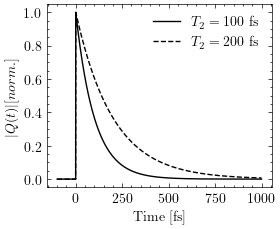

In [26]:
# --- Define time domain signal ---
Fs = 5000          # Sampling frequency (Hz)
dt = 1/Fs
N = 2000
theta_arr = np.linspace(-100e-15, 1000e-15, N)
t_array = theta_arr
T2 = [100e-15, 200e-15]  # Dephasing time in seconds
del_omega = np.array([0,0]) * 2 * np.pi * 1e12  # Frequency detuning in rad/s
tau_p = [100e-15,100e-15]  # Pulse duration in seconds
Q_z_t_1_array = np.zeros_like(t_array, dtype=complex)
Q_z_t_2_array = np.zeros_like(t_array, dtype=complex)
for i, t in enumerate(t_array):
    Q_z_t_1_array[i] = np.sum(np.heaviside(t, theta_arr) * np.exp(- (t - theta_arr) / (T2[0]) - 1j * del_omega[0] * theta_arr) * np.exp(-4*np.log(2)*(theta_arr**2)/(tau_p[0]**2)))*dt
    Q_z_t_2_array[i] = np.sum(np.heaviside(t, theta_arr) * np.exp(- (t - theta_arr) / (T2[1]) - 1j * del_omega[1] * theta_arr) * np.exp(-4*np.log(2)*(theta_arr**2)/(tau_p[1]**2)))*dt
plt.figure(figsize=(3, 2.5))
plt.plot(t_array*1e15, np.abs(Q_z_t_1_array)/np.max(np.abs(Q_z_t_1_array)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.plot(t_array*1e15, np.abs(Q_z_t_2_array)/np.max(np.abs(Q_z_t_2_array)), 'k--',linewidth=1, label=r'$T_2 = 200$ fs')
plt.xlabel('Time [fs]')
plt.ylabel(r'$|Q(t)| [norm.]$')
plt.tight_layout()
plt.legend()
plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_1.png', dpi=300)

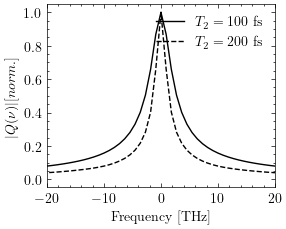

In [27]:
Q_z_om_1_array = np.fft.fftshift(np.fft.fft(Q_z_t_1_array))
Q_z_om_2_array = np.fft.fftshift(np.fft.fft(Q_z_t_2_array))
freq_array = np.fft.fftshift(np.fft.fftfreq(len(t_array), d=(t_array[1]-t_array[0])))
plt.figure(figsize=(3, 2.5))
plt.plot(freq_array*1e-12, np.abs(Q_z_om_1_array)/np.max(np.abs(Q_z_om_1_array)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.plot(freq_array*1e-12, np.abs(Q_z_om_2_array)/np.max(np.abs(Q_z_om_2_array)), 'k--',linewidth=1, label=r'$T_2 = 200$ fs')
plt.xlabel('Frequency [THz]')
plt.ylabel(r'$|Q(\nu)| [norm.]$')
plt.tight_layout()
plt.legend(loc='upper right')
plt.xlim(-20,20)
plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_2.png', dpi=300)

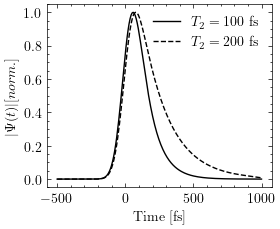

In [65]:
# --- Define time domain signal ---
#Fs = 5000          # Sampling frequency (Hz)
#dt = 1/Fs
N = 200
theta_arr = np.linspace(-500e-15, 1000e-15, N)
dt = theta_arr[1] - theta_arr[0]
t_array = theta_arr
td_array = theta_arr
T2 = [100e-15, 200e-15]  # Dephasing time in seconds
del_omega = np.array([0,0]) * 2 * np.pi * 1e12  # Frequency detuning in rad/s
tau_p = [100e-15,100e-15]  # Pulse duration in seconds

Psi_1_array = np.zeros_like(t_array, dtype=complex)
Psi_2_array = np.zeros_like(t_array, dtype=complex)
#Psi_2_array = np.zeros_like(t_array, dtype=complex)
for j, td in enumerate(td_array):
    Q_z_t_1_array = np.zeros_like(t_array, dtype=complex)
    Q_z_t_2_array = np.zeros_like(t_array, dtype=complex)
    for i, t in enumerate(t_array):
        Q_z_t_1_array[i] = np.sum(np.heaviside(t, theta_arr) * np.exp(- (t - theta_arr) / (T2[0]) - 1j * del_omega[0] * theta_arr) * np.exp(-4*np.log(2)*(theta_arr**2)/(tau_p[0]**2)))*dt
        Q_z_t_2_array[i] = np.sum(np.heaviside(t, theta_arr) * np.exp(- (t - theta_arr) / (T2[1]) - 1j * del_omega[1] * theta_arr) * np.exp(-4*np.log(2)*(theta_arr**2)/(tau_p[1]**2)))*dt
    Psi_1_array[j] = np.sum(np.exp(-2*np.log(2)*((t_array-td)**2)/(tau_p[0]**2))*Q_z_t_1_array)*dt
    Psi_2_array[j] = np.sum(np.exp(-2*np.log(2)*((t_array-td)**2)/(tau_p[0]**2))*Q_z_t_2_array)*dt
plt.figure(figsize=(3, 2.5))
plt.plot(t_array*1e15, np.abs(Psi_1_array)/np.max(np.abs(Psi_1_array)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.plot(t_array*1e15, np.abs(Psi_2_array)/np.max(np.abs(Psi_2_array)), 'k--',linewidth=1, label=r'$T_2 = 200$ fs')
plt.xlabel('Time [fs]')
plt.ylabel(r'$|\Psi(t)| [norm.]$')
plt.tight_layout()
plt.legend()
plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_3.png', dpi=300)

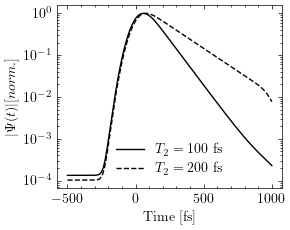

In [72]:
plt.figure(figsize=(3, 2.5))
Psi_1_array_w = Psi_1_array+1e-30
Psi_2_array_w = Psi_2_array+1e-30
plt.plot(t_array*1e15, np.abs(Psi_1_array_w)/np.max(np.abs(Psi_1_array_w)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.plot(t_array*1e15, np.abs(Psi_2_array_w)/np.max(np.abs(Psi_2_array_w)), 'k--',linewidth=1, label=r'$T_2 = 200$ fs')
plt.xlabel('Time [fs]')
plt.ylabel(r'$|\Psi(t)| [norm.]$')
plt.tight_layout()
plt.legend()
plt.yscale('log')
plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_4.png', dpi=300)

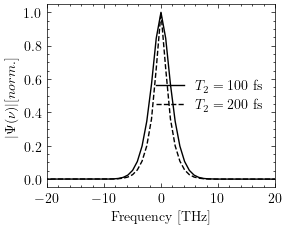

In [33]:
psi_om_1_array = np.fft.fftshift(np.fft.fft(Psi_1_array))
psi_om_2_array = np.fft.fftshift(np.fft.fft(Psi_2_array))
freq_array = np.fft.fftshift(np.fft.fftfreq(len(t_array), d=(t_array[1]-t_array[0])))
plt.figure(figsize=(3, 2.5))
plt.plot(freq_array*1e-12, np.abs(psi_om_1_array)/np.max(np.abs(psi_om_1_array)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.plot(freq_array*1e-12, np.abs(psi_om_2_array)/np.max(np.abs(psi_om_2_array)), 'k--',linewidth=1, label=r'$T_2 = 200$ fs')
plt.xlabel('Frequency [THz]')
plt.ylabel(r'$|\Psi(\nu)| [norm.]$')
plt.tight_layout()
plt.legend()
plt.xlim(-20,20)
plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_4.png', dpi=300)

In [ ]:
Q_z_om_1_array = np.fft.fftshift(np.fft.fft(Q_z_t_1_array))
freq_array = np.fft.fftshift(np.fft.fftfreq(len(t_array), d=(t_array[1]-t_array[0])))
plt.figure(figsize=(3, 2.5))
plt.plot(freq_array*1e-12, np.abs(Q_z_om_1_array)/np.max(np.abs(Q_z_om_1_array)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.xlabel('Frequency [THz]')
plt.ylabel(r'$|Psi(\nu)| [norm.]$')
plt.tight_layout()
plt.legend()
plt.xlim(-20,20)
#plt.savefig(r'C:\Users\dinus\OneDrive\Desktop\Oral Comp Exam\Written comp exam\images\fig_3.png', dpi=300)

(-20.0, 20.0)

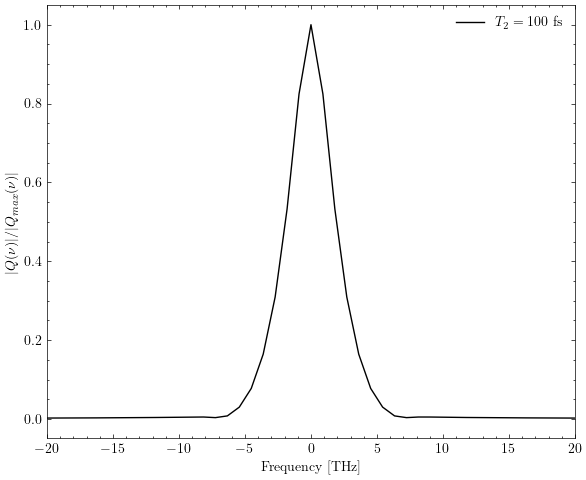

In [16]:
Psi_1_om_array = np.fft.fftshift(np.fft.fft(Psi_1_array))
freq_array = np.fft.fftshift(np.fft.fftfreq(len(t_array), d=(t_array[1]-t_array[0])))
plt.figure(figsize=(6, 5))
plt.plot(freq_array*1e-12, np.abs(Psi_1_om_array)/np.max(np.abs(Psi_1_om_array)), 'k-',linewidth=1, label=r'$T_2 = 100$ fs')
plt.xlabel('Frequency [THz]')
plt.ylabel(r'$|Q(\nu)|/|Q_{max}(\nu)|$')
plt.tight_layout()
plt.legend()
plt.xlim(-20,20)

In [ ]:
np.max(np.abs(Q_z_t_2_array))

np.float64(0.038403502468992684)

In [ ]:
C = np.max(np.abs(Q_z_t_2_array))
pol_ten = 1e-22
A = 1e9
m = 100e-27
OmR = 2 * np.pi * 30e12
pol_ten*C*A**2/4/m/OmR

np.float64(50934.227083183265)

In [ ]:
I = 100e-3/76e6/200e-15/np.pi/(0.5e-6)**2 #W/m2
E0 = np.sqrt(2*I/(3e8*epsilon_0))
E0

np.float64(2511411490.7320952)

In [ ]:
100e2/2/np.pi

1591.5494309189535

In [ ]:
x,y,z,t = sp.symbols('x y z t')
delk,w0,L = sp.symbols(r'\Delta{k} w_0 L',real=True,positive=True)
Q = sp.exp(-sp.I*delk*z) * sp.exp(-2*(x**2+y**2)/w0**2)
integrand = sp.Integral(sp.Abs(Q),(x,-sp.oo,sp.oo),(y,-sp.oo,sp.oo),(z,0,L))
sp.Eq(integrand, integrand.doit().simplify())

Eq(Integral(exp(\Delta{k}*im(z))*exp(-(2*re(x)**2 + 2*re(y)**2 - 2*im(x)**2 - 2*im(y)**2)/w_0**2), (x, -oo, oo), (y, -oo, oo), (z, 0, L)), pi*L*w_0**2/2)

In [ ]:
kas, omas, eps, c = sp.symbols(r'k_{as} \omega_{as} \epsilon c',real=True,positive=True)
Eas0 = sp.Function('E_{as0}',real=True)(z,t)
E = Eas0 * sp.exp(sp.I*(kas*z - omas*t))
d2E_dz2 = sp.diff(E, z, 2)
d2E_dt2 = sp.diff(E, t, 2)
lhs = d2E_dz2-eps/c/c*d2E_dt2
lhs.simplify()

(\epsilon*(\omega_{as}**2*E_{as0}(z, t) + 2*I*\omega_{as}*Derivative(E_{as0}(z, t), t) - Derivative(E_{as0}(z, t), (t, 2))) + c**2*(-k_{as}**2*E_{as0}(z, t) + 2*I*k_{as}*Derivative(E_{as0}(z, t), z) + Derivative(E_{as0}(z, t), (z, 2))))*exp(-I*(\omega_{as}*t - k_{as}*z))/c**2

In [ ]:
td = sp.symbols('t_d',real=True,positive=True)
Q = sp.Function('Q')(z,t)
E30 = sp.Function('E_{30}')(z,t-td)
sp.diff(Q*E30*sp.exp(-sp.I*omas*t),t,2).expand()

-\omega_{as}**2*E_{30}(z, t - t_d)*Q(z, t)*exp(-I*\omega_{as}*t) - 2*I*\omega_{as}*E_{30}(z, t - t_d)*exp(-I*\omega_{as}*t)*Derivative(Q(z, t), t) - 2*I*\omega_{as}*Q(z, t)*exp(-I*\omega_{as}*t)*Subs(Derivative(E_{30}(z, _xi_2), _xi_2), _xi_2, t - t_d) + E_{30}(z, t - t_d)*exp(-I*\omega_{as}*t)*Derivative(Q(z, t), (t, 2)) + Q(z, t)*exp(-I*\omega_{as}*t)*Subs(Derivative(E_{30}(z, _xi_2), (_xi_2, 2)), _xi_2, t - t_d) + 2*exp(-I*\omega_{as}*t)*Derivative(Q(z, t), t)*Subs(Derivative(E_{30}(z, _xi_2), _xi_2), _xi_2, t - t_d)

In [ ]:
T2 = sp.symbols('T_2',real=True,positive=True)
q = sp.I/2*Q*sp.exp(sp.I*omas*t)
(sp.diff(q,t,2).expand()+2/T2*sp.diff(q,t,1)+omas**2*q).expand()

-\omega_{as}*exp(I*\omega_{as}*t)*Derivative(Q(z, t), t) + I*exp(I*\omega_{as}*t)*Derivative(Q(z, t), (t, 2))/2 - \omega_{as}*Q(z, t)*exp(I*\omega_{as}*t)/T_2 + I*exp(I*\omega_{as}*t)*Derivative(Q(z, t), t)/T_2

In [ ]:
8**3/2/6

42.666666666666664

In [ ]:
42*3+2

128